# Playgound Series Season 3 episode 11

**objective for playground season 3 episode 11**
- EDA
- Error Analysis
- DRY 


#### Evaluation 
Root Mean Squared Log Error (RMLSE)
Submissions are scored on the root mean squared log error (RMSLE) (the sklearn mean_squared_log_error with squared=False).

#### Submission File
For each id in the test set, you must predict the value for the target cost. The file should contain a header and have the following format:

id,cost
360336,99.615
360337,87.203
360338,101.111

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
train = pd.read_csv("Data/train.csv")
test = pd.read_csv("Data/test.csv")
sub = pd.read_csv("Data/sample_submission.csv")

print(f"Train shape {train.shape}")
print(f"Test shape {test.shape}")
print(f"sub shape {sub.shape}")

Train shape (360336, 17)
Test shape (240224, 16)
sub shape (240224, 2)


In [3]:
train.set_index("id",inplace=True)
test.set_index("id",inplace=True)

In [4]:
display(train.head(3))
display(test.head(3))

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
id,,,,,,,,,,,,,,,,
0,8.61,3.0,2.0,2.0,2.0,10.30,1.0,0.0,32.0,36509.0,0.0,0.0,0.0,0.0,0.0,62.09
1,5.00,2.0,4.0,0.0,3.0,6.66,1.0,0.0,1.0,28206.0,1.0,0.0,0.0,0.0,0.0,121.80
2,14.08,4.0,0.0,0.0,3.0,21.30,1.0,0.0,26.0,21215.0,1.0,0.0,0.0,0.0,0.0,83.51


,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist
id,,,,,,,,,,,,,,,
360336,7.24,4.0,1.0,0.0,2.0,10.80,0.0,1.0,7.0,20319.0,0.0,0.0,0.0,0.0,0.0
360337,6.90,2.0,2.0,2.0,3.0,8.51,1.0,0.0,4.0,33858.0,1.0,0.0,1.0,1.0,1.0
360338,8.34,3.0,0.0,0.0,3.0,8.77,0.0,1.0,14.0,39696.0,0.0,0.0,1.0,1.0,0.0


In [5]:
train.describe()

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000
mean,6.337376,3.043881,2.456482,0.689390,2.203813,13.822071,0.568086,0.327797,18.972706,28180.333442,0.564839,0.277394,0.504807,0.504832,0.503191,99.614729
std,3.307980,0.784676,1.488992,1.214732,1.084293,4.614792,0.495343,0.469411,10.212912,5968.874074,0.495779,0.447713,0.499978,0.499977,0.499991,29.939435
min,0.510000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,20319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,3.720000,3.000000,1.000000,0.000000,1.000000,9.710000,0.000000,0.000000,10.000000,23593.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.320000
50%,5.780000,3.000000,2.000000,0.000000,2.000000,13.600000,1.000000,0.000000,20.000000,27694.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.810000
75%,8.400000,4.000000,4.000000,1.000000,3.000000,17.700000,1.000000,1.000000,28.000000,33858.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000
max,22.920000,6.000000,5.000000,5.000000,4.000000,21.900000,1.000000,1.000000,36.000000,39696.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360336 entries, 0 to 360335
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   store_sales(in millions)    360336 non-null  float64
 1   unit_sales(in millions)     360336 non-null  float64
 2   total_children              360336 non-null  float64
 3   num_children_at_home        360336 non-null  float64
 4   avg_cars_at home(approx).1  360336 non-null  float64
 5   gross_weight                360336 non-null  float64
 6   recyclable_package          360336 non-null  float64
 7   low_fat                     360336 non-null  float64
 8   units_per_case              360336 non-null  float64
 9   store_sqft                  360336 non-null  float64
 10  coffee_bar                  360336 non-null  float64
 11  video_store                 360336 non-null  float64
 12  salad_bar                   360336 non-null  float64
 13  prepared_food 

In [7]:
train.nunique()

store_sales(in millions)      1044
unit_sales(in millions)          6
total_children                   6
num_children_at_home             6
avg_cars_at home(approx).1       5
gross_weight                   384
recyclable_package               2
low_fat                          2
units_per_case                  36
store_sqft                      20
coffee_bar                       2
video_store                      2
salad_bar                        2
prepared_food                    2
florist                          2
cost                           328
dtype: int64

In [8]:
target = "cost"
target

'cost'

# Distribution of the target 

<AxesSubplot:xlabel='cost'>

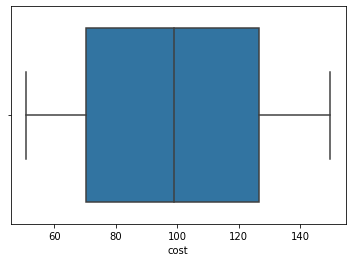

In [9]:
sns.boxplot(data=train,x="cost")

C:\Users\Erfinder\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cost', ylabel='Density'>

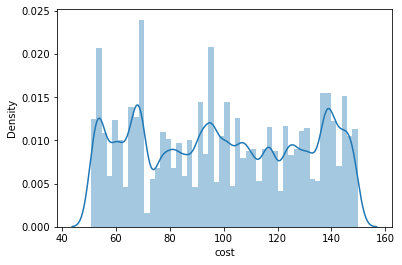

In [10]:
sns.distplot(train['cost'],kde=True)

# Distributions of features

In [11]:
train.shape,train.columns

((360336, 16),
 Index(['store_sales(in millions)', 'unit_sales(in millions)', 'total_children',
        'num_children_at_home', 'avg_cars_at home(approx).1', 'gross_weight',
        'recyclable_package', 'low_fat', 'units_per_case', 'store_sqft',
        'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist',
        'cost'],
       dtype='object'))

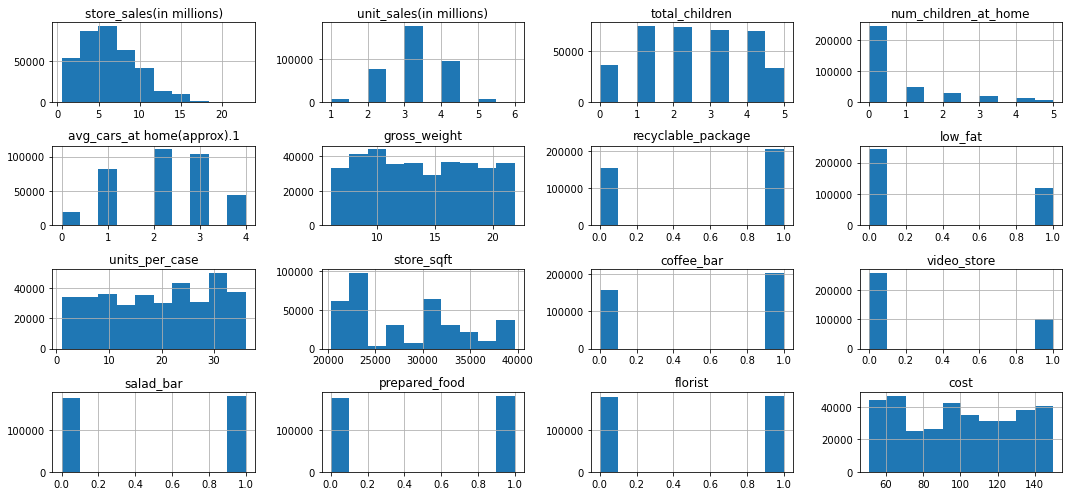

In [12]:
train.hist(figsize=(15,7));
plt.tight_layout()

**todo** : create features from  'num_children_at_home' where feature x = 0 if  'num_children_at_home' ==0 else 1

#*error*
fig,axes = plt.subplots(4,4)
axes = axes.ravel()
for i, ax in enumerate(axes):
    ax.hist(train[i])

train.shape[1]
for i in range(train.shape[1]):
    plt.subplot(2,2,i+1)
    plt.plot(train[i])

### Feature and target plots

In [13]:
#sns.pairplot(data = train) took too long to complete

In [14]:
train.nunique()

store_sales(in millions)      1044
unit_sales(in millions)          6
total_children                   6
num_children_at_home             6
avg_cars_at home(approx).1       5
gross_weight                   384
recyclable_package               2
low_fat                          2
units_per_case                  36
store_sqft                      20
coffee_bar                       2
video_store                      2
salad_bar                        2
prepared_food                    2
florist                          2
cost                           328
dtype: int64

<AxesSubplot:xlabel='store_sales(in millions)', ylabel='cost'>

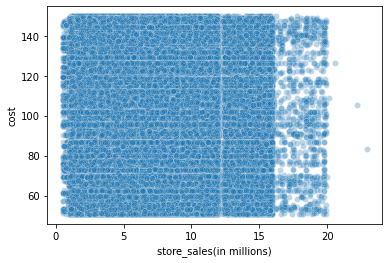

In [15]:
sns.scatterplot(data =train,x="store_sales(in millions)",y="cost",alpha=0.3)

<AxesSubplot:xlabel='gross_weight', ylabel='cost'>

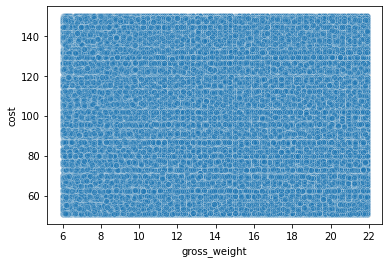

In [16]:
sns.scatterplot(data =train,x="gross_weight",y="cost",alpha=0.3)

In [17]:
train.nunique()

store_sales(in millions)      1044
unit_sales(in millions)          6
total_children                   6
num_children_at_home             6
avg_cars_at home(approx).1       5
gross_weight                   384
recyclable_package               2
low_fat                          2
units_per_case                  36
store_sqft                      20
coffee_bar                       2
video_store                      2
salad_bar                        2
prepared_food                    2
florist                          2
cost                           328
dtype: int64

<AxesSubplot:xlabel='unit_sales(in millions)', ylabel='cost'>

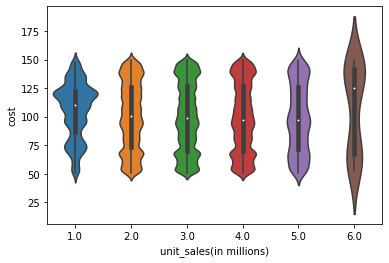

In [18]:
sns.violinplot(data=train,x= "unit_sales(in millions)" ,y='cost')

C:\Users\Erfinder\AppData\Local\Temp\ipykernel_7052\497617132.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data['unit_sales(in millions)'] = plot_data['unit_sales(in millions)'].astype('category')


<AxesSubplot:xlabel='cost', ylabel='Density'>

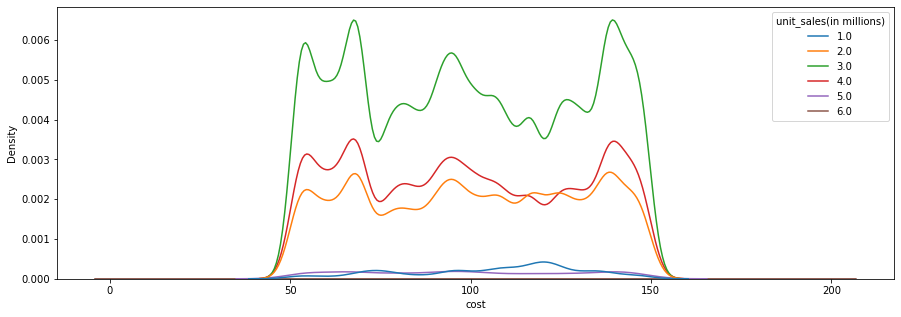

In [19]:
# selecting the grouped densities in "unit_sales(in millions)"
plot_data = train[['cost','unit_sales(in millions)']]
plot_data['unit_sales(in millions)'] = plot_data['unit_sales(in millions)'].astype('category')
plt.figure(figsize=(15,5))
sns.kdeplot(data = plot_data,hue='unit_sales(in millions)', x="cost")

<AxesSubplot:xlabel='total_children', ylabel='cost'>

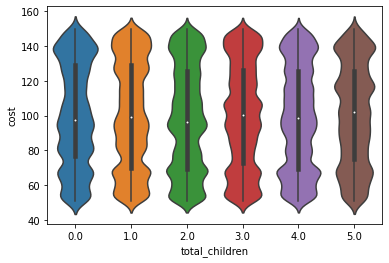

In [20]:
sns.violinplot(data=train,x="total_children" ,y='cost')

C:\Users\Erfinder\AppData\Local\Temp\ipykernel_7052\2347314891.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data['total_children'] = plot_data['total_children'].astype('category')


<AxesSubplot:xlabel='cost', ylabel='Density'>

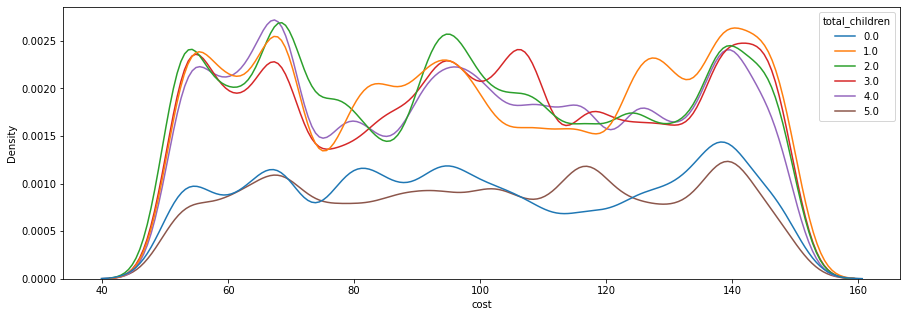

In [21]:
# selecting the grouped densities in "total_children"
plot_data = train[['cost','total_children']]
plot_data['total_children'] = plot_data['total_children'].astype('category')
plt.figure(figsize=(15,5))
sns.kdeplot(data = plot_data,hue='total_children', x="cost")

<AxesSubplot:xlabel='num_children_at_home', ylabel='cost'>

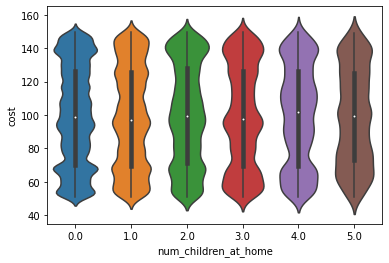

In [22]:
sns.violinplot(data=train,x= "num_children_at_home" ,y='cost')

C:\Users\Erfinder\AppData\Local\Temp\ipykernel_7052\2705261374.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data['num_children_at_home'] = plot_data['num_children_at_home'].astype('category')


<AxesSubplot:xlabel='cost', ylabel='Density'>

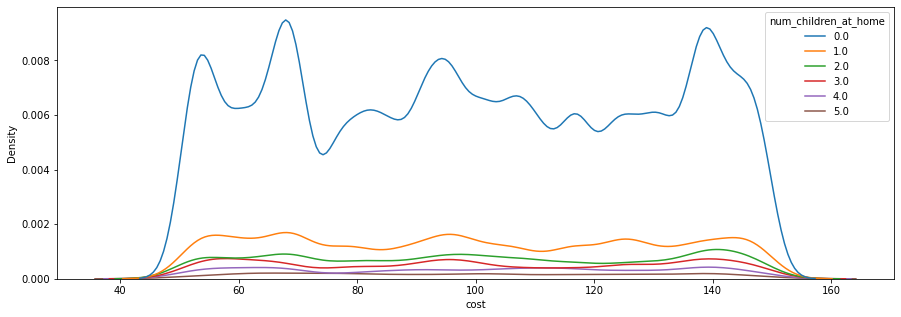

In [23]:
# selecting the grouped densities in "num_children_at_home"
plot_data = train[['cost','num_children_at_home']]
plot_data['num_children_at_home'] = plot_data['num_children_at_home'].astype('category')
plt.figure(figsize=(15,5))
sns.kdeplot(data = plot_data,hue='num_children_at_home', x="cost")

<AxesSubplot:xlabel='avg_cars_at home(approx).1', ylabel='cost'>

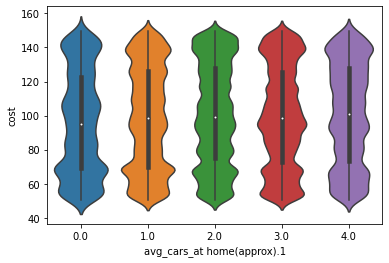

In [24]:
sns.violinplot(data=train,x= "avg_cars_at home(approx).1" ,y='cost')

C:\Users\Erfinder\AppData\Local\Temp\ipykernel_7052\420688251.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data['avg_cars_at home(approx).1'] = plot_data['avg_cars_at home(approx).1'].astype('category')


<AxesSubplot:xlabel='cost', ylabel='Density'>

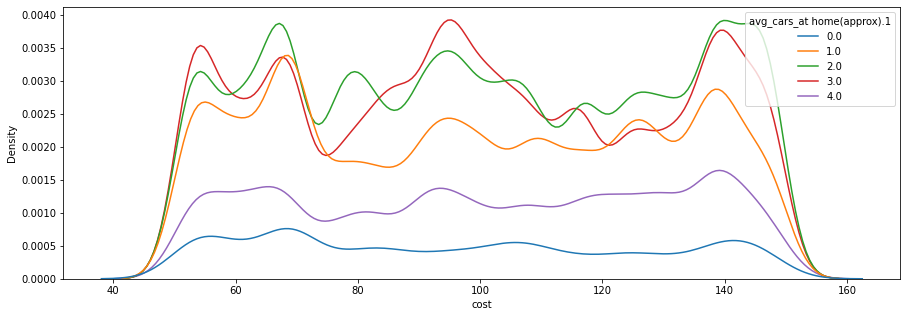

In [25]:
# selecting the grouped densities in "avg_cars_at home(approx).1"
plot_data = train[['cost','avg_cars_at home(approx).1']]
plot_data['avg_cars_at home(approx).1'] = plot_data['avg_cars_at home(approx).1'].astype('category')
plt.figure(figsize=(15,5))
sns.kdeplot(data = plot_data,hue='avg_cars_at home(approx).1', x="cost")

<AxesSubplot:xlabel='recyclable_package', ylabel='cost'>

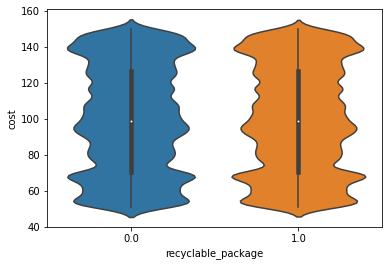

In [26]:
sns.violinplot(data=train,x="recyclable_package"  ,y='cost')

<AxesSubplot:xlabel='cost', ylabel='Density'>

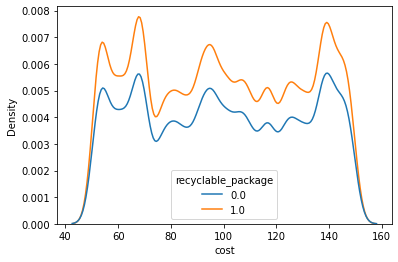

In [27]:
sns.kdeplot(data=train,hue='recyclable_package', x="cost")

<AxesSubplot:xlabel='low_fat', ylabel='cost'>

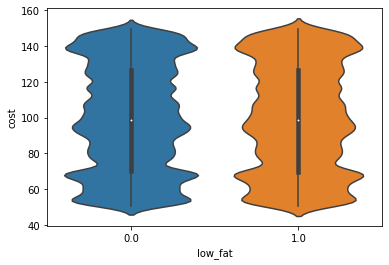

In [28]:
sns.violinplot(data=train,x= "low_fat" ,y='cost')

<AxesSubplot:xlabel='cost', ylabel='Density'>

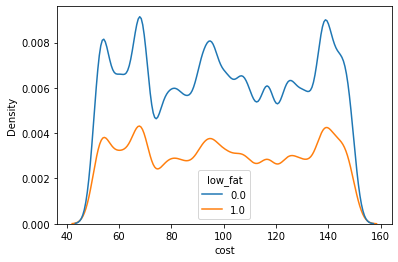

In [29]:
sns.kdeplot(data=train,hue='low_fat', x="cost")

<AxesSubplot:xlabel='units_per_case', ylabel='cost'>

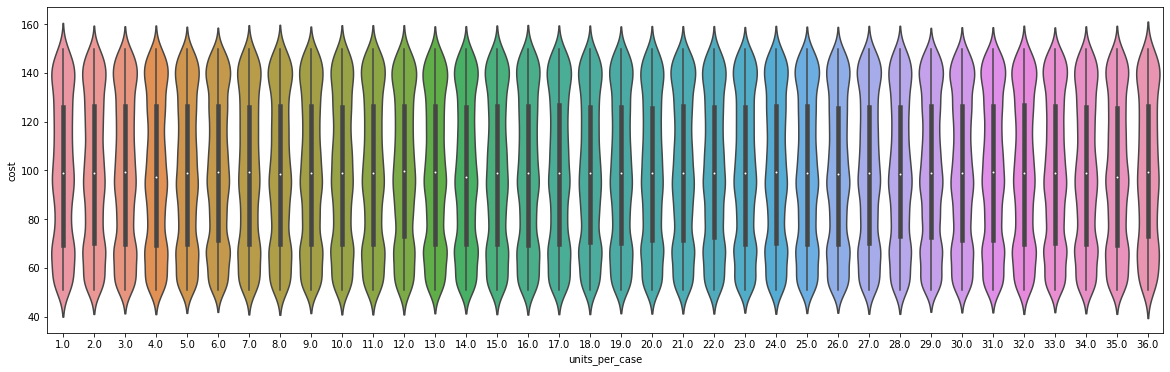

In [30]:
plt.figure(figsize=(20,6))
sns.violinplot(data=train,x='units_per_case',y='cost')

<AxesSubplot:xlabel='cost', ylabel='Density'>

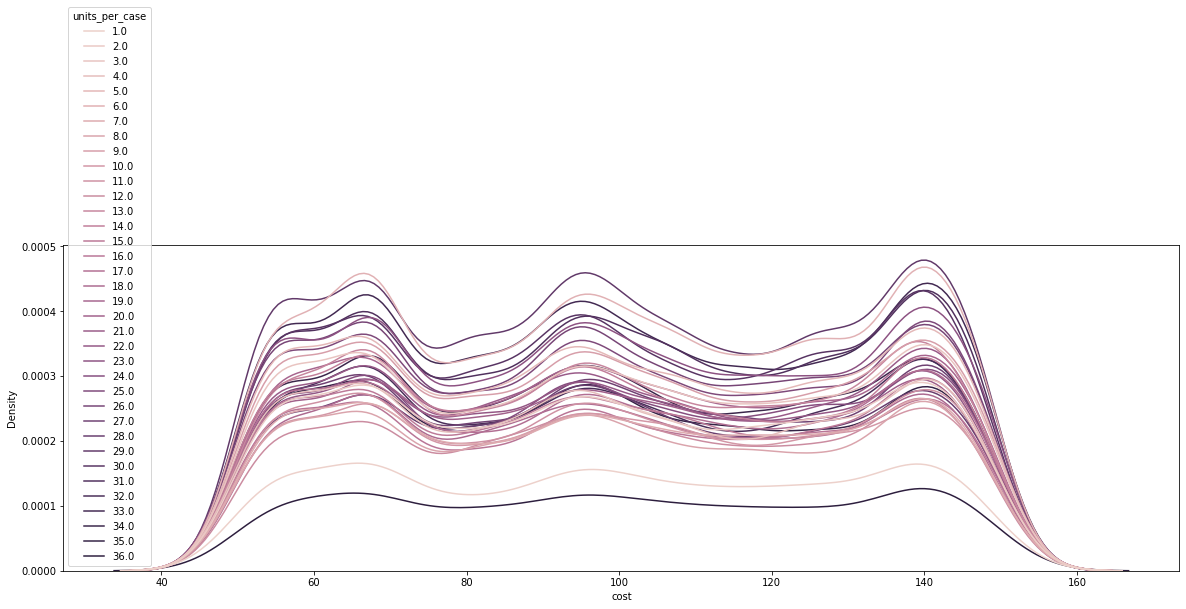

In [31]:
plt.figure(figsize=(20,6))
sns.kdeplot(data=train,hue='units_per_case', x="cost")

C:\Users\Erfinder\AppData\Local\Temp\ipykernel_7052\947697916.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data['units_per_case'] = plot_data['units_per_case'].astype('category')


<AxesSubplot:xlabel='cost', ylabel='Density'>

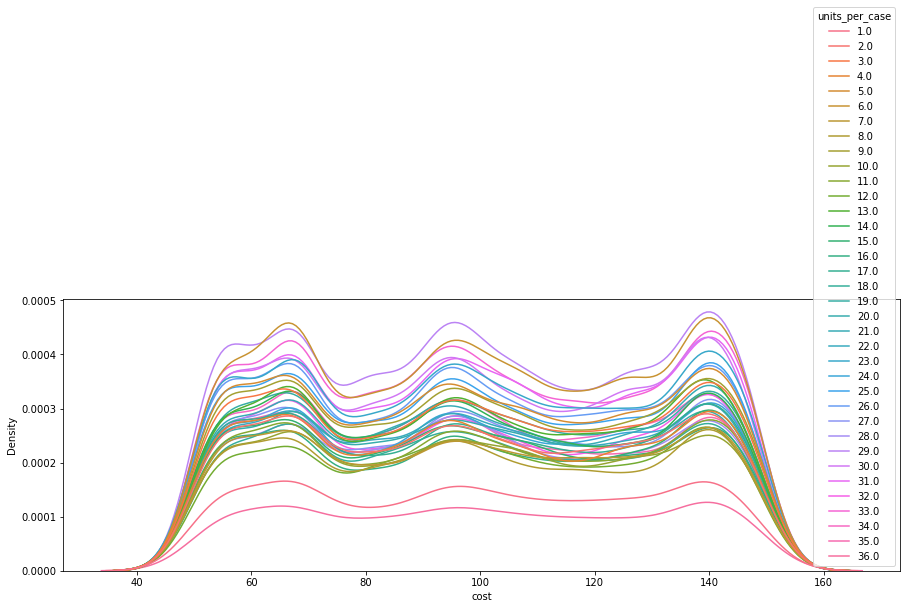

In [32]:
# selecting the grouped densities in "units_per_case"
plot_data = train[['cost','units_per_case']]
plot_data['units_per_case'] = plot_data['units_per_case'].astype('category')
plt.figure(figsize=(15,5))
sns.kdeplot(data = plot_data,hue='units_per_case', x="cost")

<AxesSubplot:xlabel='store_sqft', ylabel='cost'>

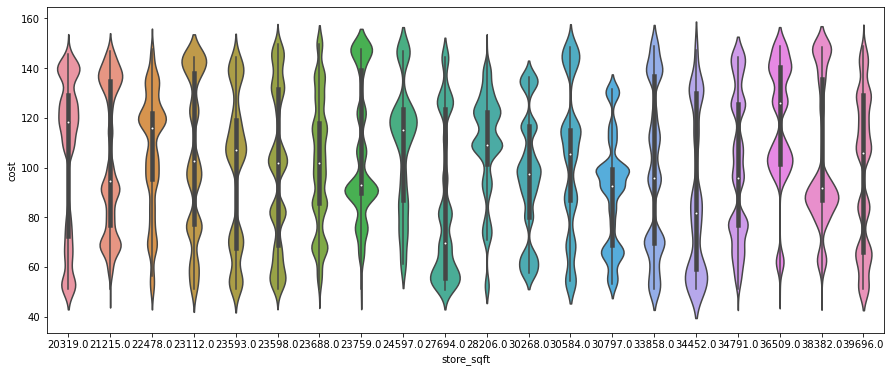

In [33]:
plt.figure(figsize=(15,6))
sns.violinplot(data=train,x='store_sqft',y='cost')

<AxesSubplot:xlabel='cost', ylabel='Density'>

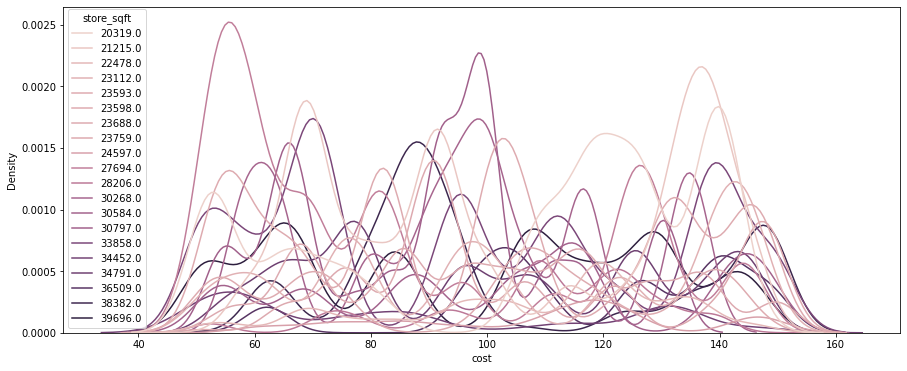

In [34]:
plt.figure(figsize=(15,6))
sns.kdeplot(data=train,hue='store_sqft', x="cost")

C:\Users\Erfinder\AppData\Local\Temp\ipykernel_7052\118783765.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data['store_sqft'] = plot_data['store_sqft'].astype('category')


<AxesSubplot:xlabel='cost', ylabel='Density'>

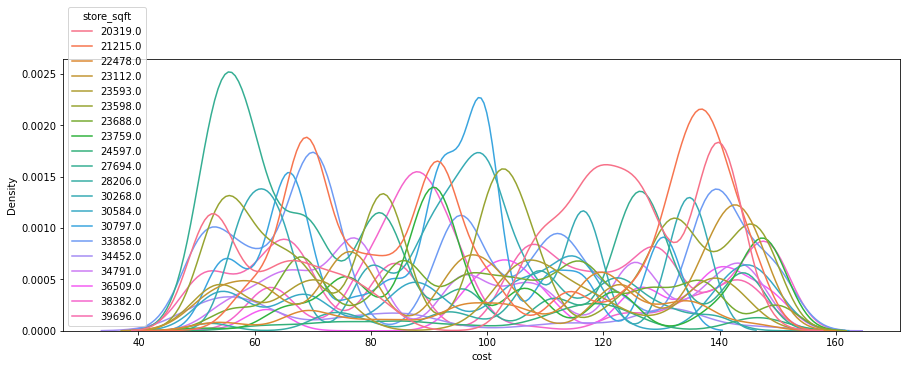

In [35]:
# selecting the grouped densities in "store_sqft"
plot_data = train[['cost','store_sqft']]
plot_data['store_sqft'] = plot_data['store_sqft'].astype('category')
plt.figure(figsize=(15,5))
sns.kdeplot(data = plot_data,hue='store_sqft', x="cost")

<AxesSubplot:xlabel='coffee_bar', ylabel='cost'>

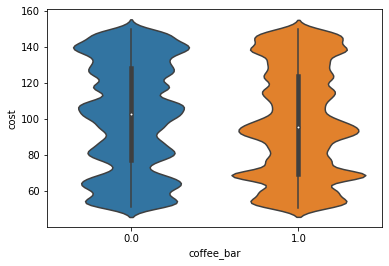

In [36]:
sns.violinplot(data=train,x='coffee_bar',y='cost')

<AxesSubplot:xlabel='cost', ylabel='Density'>

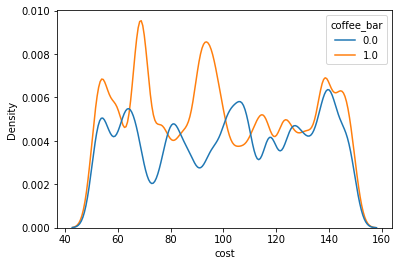

In [37]:
sns.kdeplot(data=train,hue='coffee_bar', x="cost")

<AxesSubplot:xlabel='video_store', ylabel='cost'>

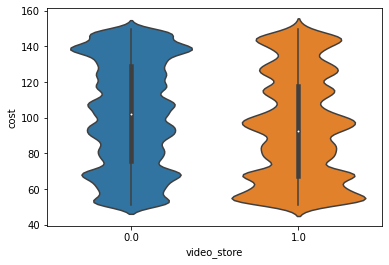

In [38]:
sns.violinplot(data=train,x='video_store',y='cost')

<AxesSubplot:xlabel='cost', ylabel='Density'>

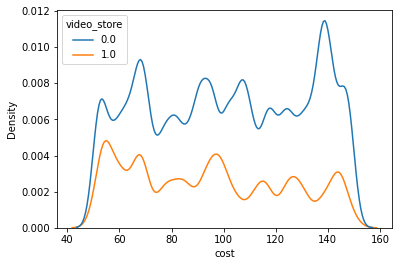

In [39]:
sns.kdeplot(data=train,hue='video_store', x="cost")

<AxesSubplot:xlabel='salad_bar', ylabel='cost'>

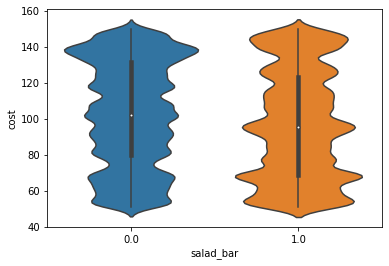

In [40]:
sns.violinplot(data=train,x='salad_bar',y='cost')

<AxesSubplot:xlabel='cost', ylabel='Density'>

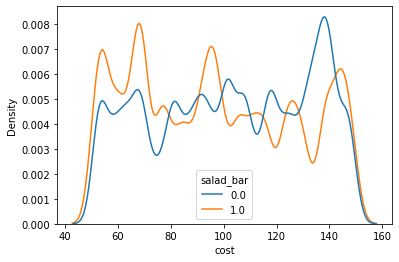

In [41]:
sns.kdeplot(data=train,hue='salad_bar', x="cost")

In [42]:
train['prepared_food'].unique()

array([0., 1.])

<AxesSubplot:xlabel='prepared_food', ylabel='cost'>

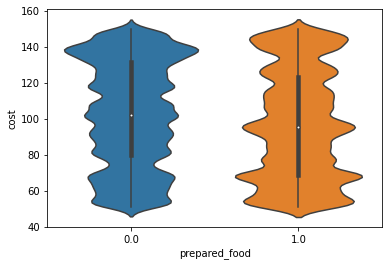

In [43]:
sns.violinplot(data=train,x='prepared_food',y='cost')

<AxesSubplot:xlabel='cost', ylabel='Density'>

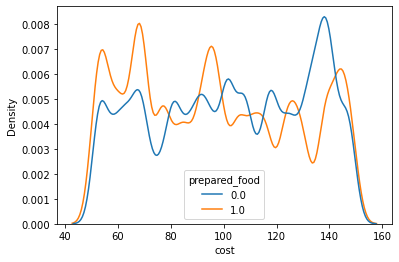

In [44]:
sns.kdeplot(data=train,hue='prepared_food', x="cost")

<AxesSubplot:xlabel='florist', ylabel='cost'>

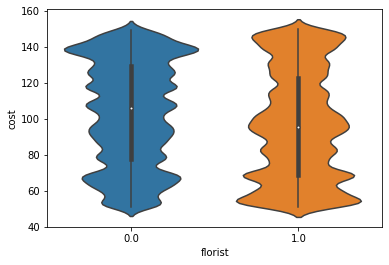

In [45]:
sns.violinplot(data=train,x='florist',y='cost')

<AxesSubplot:xlabel='cost', ylabel='Density'>

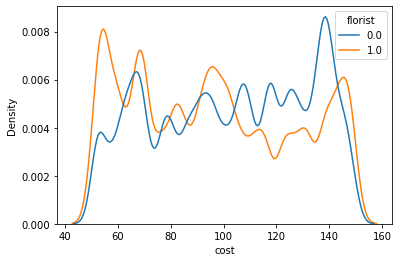

In [46]:
sns.kdeplot(data=train,hue='florist', x="cost")

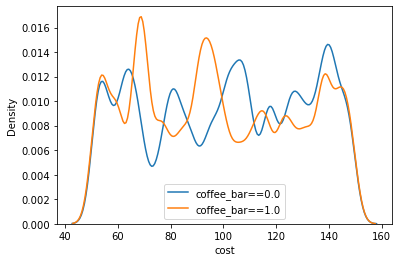

In [47]:
temp1 = train.loc[train['coffee_bar'] == 0.0,['coffee_bar','cost']]
temp2 = train.loc[train['coffee_bar'] == 1.0,['coffee_bar','cost']]
sns.kdeplot(data=temp1, x="cost",label="coffee_bar==0.0")
sns.kdeplot(data=temp2, x="cost", label="coffee_bar==1.0")
plt.legend()
plt.show()

# Check for missing values

In [48]:
train.isnull().sum().any(),test.isnull().sum().any()

(False, False)

# Adverserial Search

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,cross_val_predict
#from sklearn.metrix import roc_auc_score
from sklearn.metrics import roc_auc_score

print(f"Train shape {train.shape}")
print(f"Test shape {test.shape}")

X = pd.concat([train.drop(['cost'],axis=1),test],axis=0)
y = len(train)*[1] + len(test)*[0]
print(f" X shape {X.shape} ")
print(f" y len {len(y)} ")

Train shape (360336, 16)
Test shape (240224, 15)
 X shape (600560, 15) 
 y len 600560 


model = RandomForestClassifier(random_state=2023)
cv_preds = cross_val_predict(model,X,y,cv=2,n_jobs=-1,method="predict_proba")

print(roc_auc_score(y_true=y,y_score=cv_preds[:,1]))

# feature transformations

In [50]:
temp = pd.DataFrame(train.nunique())
temp.columns =['num_unique']
temp.sort_values(by=['num_unique'])

,num_unique
recyclable_package,2
low_fat,2
coffee_bar,2
video_store,2
salad_bar,2
prepared_food,2
florist,2
avg_cars_at home(approx).1,5
unit_sales(in millions),6
total_children,6


<AxesSubplot:>

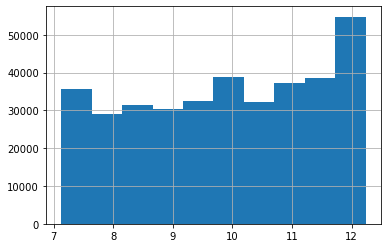

In [51]:
np.sqrt(train['cost']).hist()

<AxesSubplot:xlabel='cost', ylabel='Density'>

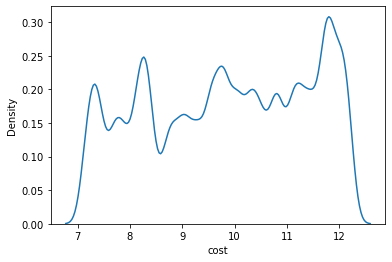

In [52]:
sns.kdeplot(data= np.sqrt(train['cost']))

<AxesSubplot:xlabel='cost', ylabel='Density'>

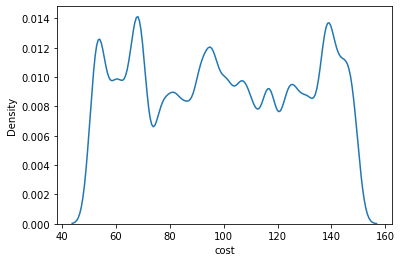

In [53]:
sns.kdeplot(data= train['cost'])

#**error**
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
ax4.plot(train['cost'],kind='hist')

# outliers

In [54]:
import statsmodels.api as sm


In [55]:
xcols = train.columns.drop('cost')
xcols

Index(['store_sales(in millions)', 'unit_sales(in millions)', 'total_children',
       'num_children_at_home', 'avg_cars_at home(approx).1', 'gross_weight',
       'recyclable_package', 'low_fat', 'units_per_case', 'store_sqft',
       'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist'],
      dtype='object')

In [56]:
y = train['cost']
y

id
0          62.09
1         121.80
2          83.51
3          66.78
4         111.51
           ...  
360331    133.42
360332     81.85
360333     87.07
360334    146.72
360335    122.47
Name: cost, Length: 360336, dtype: float64

## Determing influencial points

In [106]:
def getlm(df):
    Y = train['cost']
    X = train[xcols]
    X = sm.add_constant(X)
    return sm.OLS(Y,X).fit()

In [109]:
lm = getlm(train[xcols])
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cost   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     478.5
Date:                Fri, 24 Mar 2023   Prob (F-statistic):               0.00
Time:                        09:56:32   Log-Likelihood:            -1.7326e+06
No. Observations:              360336   AIC:                         3.465e+06
Df Residuals:                  360320   BIC:                         3.465e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        111.4561      0.420    265.615      0.000     110.634     112.279
store_sales(in millions)       0.0165      0.017      0.968      0.333      -0.017       0.050
unit_sales(in millions)       -0.4738      0.073     -6.481      0.000      -0.617      -0.331
total_children                -0.1925      0.036     -5.380      0.000      -0.263      -0.122
num_children_at_home          -0.0729      0.044     -1.664      0.096      -0.159       0.013
avg_cars_at home(approx).1     0.7718      0.046     16.809      0.000       0.682       0.862
gross_weight                  -0.0011      0.011     -0.101      0.919      -0.022       0.020
recyclable_package            -0.0617      0.100     -0.618      0.537      -0.258       0.134
low_fat                       -0.0844      0.105     -0.801      0.423      -0.291       0.122
units_per_case                 0.0012      0.005      0.240      0.811      -0.008       0.011
store_sqft                    -0.0003   1.03e-05    -29.764      0.000      -0.000      -0.000
coffee_bar                     1.0450      0.134      7.776      0.000       0.782       1.308
video_store                   -5.1514      0.161    -32.036      0.000      -5.467      -4.836
salad_bar                      6.6281      5.506      1.204      0.229      -4.163      17.420
prepared_food                 -5.9686      5.506     -1.084      0.278     -16.760       4.823
florist                       -4.9584      0.142    -34.888      0.000      -5.237      -4.680
==============================================================================
Omnibus:                   324127.857   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21736.864
Skew:                           0.034   Prob(JB):                         0.00
Kurtosis:                       1.799   Cond. No.                     4.54e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.54e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#**took too long to complete**
influence  = lm.get_influence().summary_frame()
influence.loc[influence.cooks_d > 0.5, ['cooks_d']]

fig,ax = plt.subplots(figsize=(10,6))
sm.graphics.influence_plot(lm,ax=ax,criterion="cooks")
plt.show()

train_without_influence = train.loc[influence.cooks_d < 0.5,[xcols]]
lm = getlm(train_without_influence)
lm.summary()

## outlier using isolation forest

# feature Engineering

In [ ]:
# discretization 
# clustering
# statistics
# group by
# polynomial

# feature selelection

In [114]:
X = train.drop(['cost'],axis=1)
X.shape

(360336, 15)

In [115]:
display(len(y))
y

360336

id
0          62.09
1         121.80
2          83.51
3          66.78
4         111.51
           ...  
360331    133.42
360332     81.85
360333     87.07
360334    146.72
360335    122.47
Name: cost, Length: 360336, dtype: float64

In [117]:
from sklearn.feature_selection import mutual_info_regression
mi_reg = mutual_info_regression(X,y)
mi_reg = pd.Series(mi_reg)
mi_reg.index = X.columns
mi_reg_df = mi_reg.sort_values(ascending=False)

<AxesSubplot:>

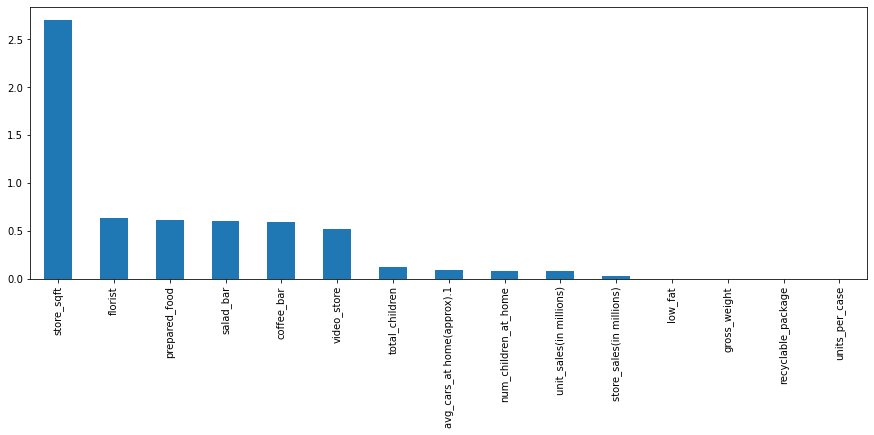

In [119]:
mi_reg_df.plot.bar(figsize=(15,5))

# modelling

In [57]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_predict,cross_val_score

In [58]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,GradientBoostingRegressor

In [59]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [61]:
X = train.drop(['cost'],axis=1)

X_train,X_test,y_train,y_test = train_test_split(X,train['cost'],test_size=0.3,random_state=2023)
print(f" X_train shape {X_train.shape}")
print(f" X_test shape {X_test.shape}")
print(f" y_train shape {y_train.shape}")
print(f"y_test shape {y_test.shape}")

 X_train shape (252235, 15)
 X_test shape (108101, 15)
 y_train shape (252235,)
y_test shape (108101,)


## pipeline

In [73]:
temp = pd.DataFrame(X_train.nunique())
temp.columns = ['num_unique']
temp = temp.sort_values(by=['num_unique'])

cat_1hot_f = list(temp.loc[temp['num_unique'] < 10].index)
cat_ord_f = list(temp.loc[(temp['num_unique'] > 10)&(temp['num_unique'] < 50)].index)
num_f = list(temp.loc[(temp['num_unique'] > 50)].index)

In [74]:


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [76]:
numeric_transformer = Pipeline(steps=[
    #('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_1hot_transformer = Pipeline(steps=[
    #('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
categorical_ord_transformer = Pipeline(steps=[
    #('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ord', OrdinalEncoder())
])
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_f),
    ('onehot',categorical_1hot_transformer,cat_1hot_f),
    ('ord', categorical_ord_transformer, cat_ord_f)
])
#X = preprocessor.fit_transform(x)

In [77]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['gross_weight', 'store_sales(in millions)']),
                                ('onehot',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['recyclable_package', 'low_fat', 'coffee_bar',
                                  'video_store', 'salad_bar', 'prepared_food',
                                  'florist', 'avg_cars_at home(approx).1',
                                  'unit_sales(in millions)', 'total_children',
                                  'num_children_at_home']),
                                ('ord',
                                 Pipeline(steps=[('ord', OrdinalEncoder())]),
                                 ['store_sqft', 'units_per_case'])])

In [78]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [79]:
X_train_processed

array([[ 1.07849451,  1.57079701,  1.        , ...,  0.        ,
         9.        , 32.        ],
       [ 0.47219609,  0.59920571,  1.        , ...,  0.        ,
        19.        , 12.        ],
       [ 0.88361288, -1.06854133,  0.        , ...,  0.        ,
         9.        , 31.        ],
       ...,
       [ 0.6237707 , -1.23804012,  1.        , ...,  0.        ,
        18.        , 32.        ],
       [-0.61047967, -0.62663376,  0.        , ...,  0.        ,
        19.        , 19.        ],
       [ 1.55487185,  1.15915708,  0.        , ...,  0.        ,
         9.        , 24.        ]])

In [92]:
preprocessor.get_feature_names_out()

AttributeError: Estimator ord does not provide get_feature_names_out. Did you mean to call pipeline[:-1].get_feature_names_out()?

##  training

In [83]:
from sklearn.metrics import mean_squared_log_error

In [85]:
ext = ExtraTreesRegressor(random_state=2023,n_jobs=-1)
ext.fit(X_train,y_train)

ExtraTreesRegressor(n_jobs=-1, random_state=2023)

In [ ]:
import joblib
#joblib.dump(ext,"extraTreeReg_baseline0_X_train_model.pkl")

# loading model
#ext = joblib.load("extraTreeReg_baseline0_X_train_model.pkl")

In [97]:
y_pred_train = ext.predict(X_train)
msle =  mean_squared_log_error(y_train,y_pred_train,squared=False)
msle

1.3477538939151036e-05

In [104]:
# Analyse predictions
pred_errors = X_train.copy()
pred_errors['cost'] = y_train
pred_errors['prediction'] = y_pred_train
pred_errors['error'] = abs(pred_errors.prediction - pred_errors.cost)
#ea_cols = all_imp
#pred_errors = pred_errors[all_imp+['emission', 'prediction', 'error']]
pred_errors.sort_values(by = 'error', ascending = False, inplace = True)
display(pred_errors.head())

#pred_errors.to_csv('pred_errors_extraTress_baseline_X_train.csv')

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost,prediction,error
id,,,,,,,,,,,,,,,,,,
300317,5.00,4.0,5.0,0.0,2.0,8.28,1.0,0.0,18.0,23598.0,0.0,0.0,0.0,0.0,1.0,107.89,108.114367,0.224367
217096,3.68,4.0,5.0,0.0,2.0,6.63,1.0,0.0,35.0,23598.0,0.0,0.0,0.0,0.0,1.0,107.89,108.114367,0.224367
193225,5.00,4.0,5.0,0.0,2.0,6.98,1.0,0.0,35.0,23598.0,0.0,0.0,0.0,0.0,1.0,147.17,147.001567,0.168433
226485,3.76,4.0,5.0,0.0,2.0,8.42,1.0,0.0,25.0,23598.0,0.0,0.0,0.0,0.0,1.0,147.17,147.001567,0.168433
351905,3.56,2.0,3.0,0.0,2.0,19.00,1.0,0.0,19.0,24597.0,1.0,0.0,0.0,0.0,0.0,146.72,146.570950,0.149050


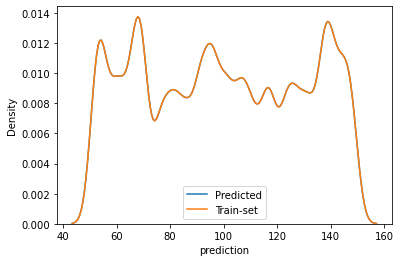

In [105]:
sns.kdeplot(data=pred_errors, x="prediction",label="Predicted")
sns.kdeplot(data=pred_errors, x="cost", label="Train-set")
plt.legend()
plt.show()

In [86]:
y_pred = ext.predict(X_test)
msle =  mean_squared_log_error(y_test,y_pred,squared=False)
msle

0.3202026867447913

In [106]:
# Analyse predictions
pred_errors = X_test.copy()
pred_errors['cost'] = y_test
pred_errors['prediction'] = y_pred
pred_errors['error'] = abs(pred_errors.prediction - pred_errors.cost)
#ea_cols = all_imp
#pred_errors = pred_errors[all_imp+['emission', 'prediction', 'error']]
pred_errors.sort_values(by = 'error', ascending = False, inplace = True)
display(pred_errors.head())

#pred_errors.to_csv('pred_errors_extraTress_baseline_X_test.csv')

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost,prediction,error
id,,,,,,,,,,,,,,,,,,
22254,6.57,3.0,2.0,2.0,2.0,19.50,1.0,1.0,3.0,33858.0,1.0,0.0,1.0,1.0,1.0,149.08,56.3004,92.7796
9315,5.88,4.0,2.0,2.0,1.0,17.20,0.0,1.0,5.0,34452.0,1.0,0.0,0.0,0.0,1.0,147.17,54.6787,92.4913
277212,2.13,3.0,4.0,4.0,2.0,20.00,0.0,1.0,2.0,34452.0,1.0,0.0,0.0,0.0,1.0,147.17,54.9984,92.1716
304697,5.04,4.0,2.0,1.0,1.0,10.40,0.0,0.0,23.0,23112.0,1.0,1.0,1.0,1.0,1.0,51.00,142.8620,91.8620
251399,1.59,3.0,3.0,0.0,2.0,8.16,1.0,1.0,33.0,30584.0,1.0,1.0,1.0,1.0,1.0,54.36,145.1971,90.8371


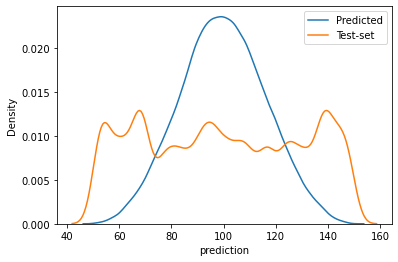

In [107]:
sns.kdeplot(data=pred_errors, x="prediction",label="Predicted")
sns.kdeplot(data=pred_errors, x="cost", label="Test-set")
plt.legend()
plt.show()

## Evaluation

## Feature importance

In [ ]:
attributes = cat_1hot_f = list(temp.loc[temp['num_unique'] < 10].index)
cat_ord_f = list(temp.loc[(temp['num_unique'] > 10)&(temp['num_unique'] < 50)].index)
num_f = list(temp.loc[(temp['num_unique'] > 50)].index)

In [ ]:
# Feature importance
impo_df = pd.DataFrame({
    #'feature': X_train.columns, 
                        'importance': ext_.feature_importances_}).set_index('feature').sort_values(by = 'importance', ascending = False)
impo_df = impo_df[:12].sort_values(by = 'importance', ascending = False)
extra_imp = impo_df.head().index
extra_imp

In [103]:
# Feature importance
ext.feature_importances_

array([0.23061428, 0.0708509 , 0.04596403, 0.03358111, 0.04183968,
       0.22599244, 0.03683569, 0.03391293, 0.21014501, 0.04804467,
       0.00393087, 0.00261098, 0.00105322, 0.00250756, 0.01211663])

## Error Analysis

In [ ]:
#rf_reg = RandomForestRegressor(random_state=2023)
#cross_val_score(rf_reg,X_train,y_train,cv=3,scoring='neg_mean_squared_log_error')

In [ ]:
feature_importances = rf_reg.feature_importances_
num_attribs = list(num_num_f)

**Research** : cooks distance
**Research** :
**Research** :
**Research** :
**Research** :
**Research** : feature scaling for categorical variables does it make sense